In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [16]:
# define the dataframe columns
column_names = ['Areas', 'PostCode', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [17]:
neighborhoods 

,Areas,PostCode,Latitude,Longitude


In [18]:
neighborhoods1 = pd.read_csv('zipcode.csv')
neighborhoods1.head()

,Area,PostCode,Lat,Lon
0,ADDISON,49220,42.007252,-84.322649
1,ADRIAN,49221,41.885177,-84.059029
2,ALBION,49224,42.293696,-84.752448
3,ALGONAC,48001,42.643334,-82.583495
4,ALLEN,49227,41.938728,-84.752448


In [19]:
len(neighborhoods1)

904

In [49]:
neighborhoods = neighborhoods1[701:]

In [50]:
print('The dataframe has {} neighborhood.'.format(
        len(neighborhoods['Area'].unique()),
    )
)

The dataframe has 190 neighborhood.


In [51]:
address = 'Detroit, MI'

geolocator = Nominatim(user_agent="mi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Detroit,MI are 42.3315509, -83.0466403.


In [52]:
# create map of New York using latitude and longitude values
map_detroit = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area, postcode in zip(neighborhoods['Lat'], neighborhoods['Lon'], neighborhoods['Area'], neighborhoods['PostCode']):
    label = '{}, {}'.format(postcode, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_detroit)  
    
map_detroit

In [53]:
CLIENT_ID = 'VBEKBLYM2HGUTRH34JFAZCZ4DLQO2VGB22GKOXWH3A2RX5HF' # your Foursquare ID
CLIENT_SECRET = 'BVL040GAVQEOOESXFPVXKFWFEHNC1SNH4UCCBGW1LQA30SCY' # your Foursquare Secret
VERSION = '20190309' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VBEKBLYM2HGUTRH34JFAZCZ4DLQO2VGB22GKOXWH3A2RX5HF
CLIENT_SECRET:BVL040GAVQEOOESXFPVXKFWFEHNC1SNH4UCCBGW1LQA30SCY


In [54]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [55]:
def getNearbyVenues(names, postcodes, latitudes, longitudes, radius=3218):
    LIMIT = 50
    venues_list=[]
    for name, postcode, lat, lng in zip(names, postcodes, latitudes, longitudes):
        print(name + " " + str(postcode))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print("Error occurred for " + name)
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name + "-" + str(postcode),
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
michigan_venues = getNearbyVenues(names=neighborhoods['Area'],
                                  postcodes=neighborhoods['PostCode'],
                                   latitudes=neighborhoods['Lat'],
                                   longitudes=neighborhoods['Lon']
                                  )


MILLERSBURG 49759
MILLINGTON 48746
MIO 48647
MOHAWK 49950
MONTAGUE 49437
MORAN 49760
MORLEY 49336
MORRICE 48857
MOUNT PLEASANT 48858
MUIR 48860
MULLIKEN 48861
MUNGER 48747
MUNISING 49862
MUSKEGON 49440
MUSKEGON 49441
MUSKEGON 49442
MUSKEGON 49444
MUSKEGON 49445
NASHVILLE 49073
NATIONAL CITY 48748
NAUBINWAY 49762
NEGAUNEE 49866
NEWAYGO 49337
NEWBERRY 49868
NEW BUFFALO 49117
NEW ERA 49446
NILES 49120
NISULA 49952
NORTHPORT 49670
NORWAY 49870
NUNICA 49448
OAKLEY 48649
OKEMOS 48864
OLIVET 49076
OMER 48749
ONAWAY 49765
ONEKAMA 49675
ONTONAGON 49953
ORLEANS 48865
OSCODA 48750
Error occurred for OSCODA
OSSINEKE 49766
OTSEGO 49078
OVID 48866
OWENDALE 48754
OWOSSO 48867
PARADISE 49768
PARIS 49338
PAW PAW 49079
PELKIE 49958
PELLSTON 49769
PENTWATER 49449
PERRINTON 48871
PERRONVILLE 49873
PERRY 48872
PETOSKEY 49770
PEWAMO 48873
PICKFORD 49774
PIERSON 49339
PIGEON 48755
PINCONNING 48650
PLAINWELL 49080
POINTE AUX PINS 49775
PORTLAND 48875
POSEN 49776
POTTERVILLE 48876
POWERS 49874
PRESCOTT 48756
P

In [38]:
print(michigan_venues.shape)
michigan_venues.head()

(4663, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PORT SANILAC-48469,43.423836,-82.551047,Blue Water Sports Bar & Grill,43.431060,-82.542136,Bar
1,PORT SANILAC-48469,43.423836,-82.551047,Uri's Waterfront Dining,43.430242,-82.539458,American Restaurant
2,PORT SANILAC-48469,43.423836,-82.551047,Stone Lodge,43.426980,-82.543180,American Restaurant
3,PORT SANILAC-48469,43.423836,-82.551047,IGA Supermarket,43.435536,-82.543497,Grocery Store
4,PORT SANILAC-48469,43.423836,-82.551047,The Barn Theatre,43.424048,-82.543759,Theater


In [57]:
# export_csv = michigan_venues.to_csv (r'E:\mich900.csv', index = None, header=True)

In [83]:
michigan_venues = pd.read_csv('michigan2.csv')

In [84]:
len(michigan_venues)

16681

In [85]:
x = michigan_venues.groupby("Neighborhood")
len(x)

833

In [86]:
michigan_venues = x.filter(lambda x: x['Neighborhood'].count() > 4)
len(michigan_venues)

16118

In [87]:
# michigan_venues.groupby('Neighborhood').count()
# temp.head()
# len(temp)


In [88]:
# temp = temp[temp['Neighborhood Latitude'] >4]
# len(temp)

In [89]:
print('There are {} uniques categories.'.format(len(michigan_venues['Venue Category'].unique())))

There are 425 uniques categories.


In [90]:
# one hot encoding
michigan_onehot = pd.get_dummies(michigan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
michigan_onehot['Neighborhood'] = michigan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [michigan_onehot.columns[-1]] + list(michigan_onehot.columns[:-1])
michigan_onehot = michigan_onehot[fixed_columns]

michigan_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

In [91]:
michigan_onehot.shape

(16118, 425)

In [92]:
michigan_grouped = michigan_onehot.groupby('Neighborhood').mean().reset_index()
michigan_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Hockey Rink,College Rec Center,College Residence Hall,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Credit Union,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Hungarian Restaurant,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great 

In [93]:
michigan_grouped.shape

(598, 425)

In [94]:
num_top_venues = 5

for hood in michigan_grouped['Neighborhood']:
#     print("----"+hood+"----")
    temp = michigan_grouped[michigan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [96]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = michigan_grouped['Neighborhood']

for ind in np.arange(michigan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(michigan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,ADA-49301,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course
1,ADDISON-49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping
2,ADRIAN-49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place
3,ALDEN-49612,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina
4,ALGONAC-48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout


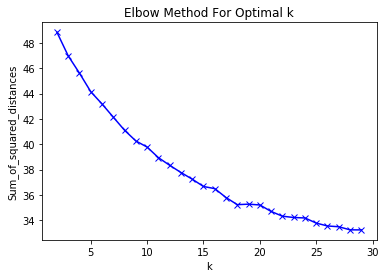

In [98]:
# # set number of clusters
# kclusters = 3

michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

# # run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(michigan_grouped_clustering)

# # check cluster labels generated for each row in the dataframe
# kmeans.labels_[0:10] 

Sum_of_squared_distances = []
K = range(2, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, random_state=0).fit(michigan_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
# set number of clusters
kclusters = 16

michigan_grouped_clustering = michigan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(michigan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 5,  2, 11,  1,  7,  9, 11, 11,  9, 11])

In [101]:
data = neighborhoods_venues_sorted.copy()
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# new data frame with split value columns 
new = data["Neighborhood"].str.split("-", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
data["Area"]= new[0] 
  
# making seperate last name column from new data frame 
data["PostCode"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Neighborhood"], inplace = True) 
  
# df display 
data.head()


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area,PostCode
0,Park,Gun Range,Optical Shop,Chinese Restaurant,Golf Course,ADA,49301
1,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON,49220
2,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN,49221
3,Gift Shop,Breakfast Spot,Bakery,Bar,Harbor / Marina,ALDEN,49612
4,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC,48001


In [102]:
neighborhoods_venues_sorted = data.copy()

In [103]:
# neighborhoods_venues_sorted.head()

In [104]:
# neighborhoods1.head()

In [105]:
neighborhoods1['PostCode'] = neighborhoods1['PostCode'].astype(int)
neighborhoods_venues_sorted['PostCode'] = neighborhoods_venues_sorted['PostCode'].astype(int)

In [106]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

michigan_merged = neighborhoods1.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
michigan_merged = michigan_merged.merge(neighborhoods_venues_sorted, on='PostCode', how='left')

michigan_merged.head() # check the last columns!

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,2.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,11.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
2,ALBION,49224,42.293696,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALGONAC,48001,42.643334,-82.583495,7.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
4,ALLEN,49227,41.938728,-84.752448,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# export_csv = michigan_venues.to_csv (r'E:\mich250.csv', index = None, header=True)

In [108]:
michigan_merged = michigan_merged.dropna(subset=['Area_y', 'Cluster Labels'])
michigan_merged.head()

,Area_x,PostCode,Lat,Lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,ADDISON,49220,42.007252,-84.322649,2.0,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
1,ADRIAN,49221,41.885177,-84.059029,11.0,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
3,ALGONAC,48001,42.643334,-82.583495,7.0,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
5,ALLEN PARK,48101,42.242719,-83.218476,11.0,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
7,ALMONT,48003,42.945013,-83.057616,11.0,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT


In [109]:
len(michigan_merged)

598

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(michigan_merged['Lat'], michigan_merged['Lon'], michigan_merged['Area_x'], michigan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [111]:
len(michigan_merged)

598

In [112]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 0, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
9,48104,Coffee Shop,Park,Grocery Store,Pizza Place,Sandwich Place,ANN ARBOR
21,48009,American Restaurant,Coffee Shop,Burger Joint,Spa,Pizza Place,BIRMINGHAM
26,48114,Lake,Yoga Studio,American Restaurant,Convenience Store,Coffee Shop,BRIGHTON
27,48116,American Restaurant,Coffee Shop,Supermarket,Furniture / Home Store,Italian Restaurant,BRIGHTON
43,48017,Sushi Restaurant,Pizza Place,Greek Restaurant,Bar,Park,CLAWSON
52,48120,Middle Eastern Restaurant,Mexican Restaurant,Deli / Bodega,Sandwich Place,Bar,DEARBORN
54,48124,Sandwich Place,Pizza Place,Burger Joint,History Museum,Bar,DEARBORN
55,48126,Middle Eastern Restaurant,Pizza Place,Coffee Shop,Bakery,Deli / Bodega,DEARBORN
56,48128,Coffee Shop,Middle Eastern Restaurant,Bakery,Mediterranean Restaurant,Gym / Fitness Center,DEARBORN
58,48127,Coffee Shop,Middle Eastern Restaurant,Bakery,Bar,Italian Restaurant,DEARBORN HEIGHTS


In [113]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 1, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
14,48005,Restaurant,Ice Cream Shop,Bakery,Park,Farm,ARMADA
28,49229,Ice Cream Shop,Bar,Garden,Athletics & Sports,Pizza Place,BRITTON
45,49236,Bar,American Restaurant,Gun Shop,Movie Theater,Sandwich Place,CLINTON
46,48420,Bar,Racetrack,Discount Store,Cosmetics Shop,Diner,CLIO
63,48202,Bar,History Museum,Art Gallery,Pizza Place,Performing Arts Venue,DETROIT
72,48211,Bar,Middle Eastern Restaurant,American Restaurant,Fried Chicken Joint,Grocery Store,DETROIT
130,48438,Ice Cream Shop,Diner,IT Services,BBQ Joint,Golf Course,GOODRICH
143,49242,Lake,Golf Course,Record Shop,Ice Cream Shop,Bar,HILLSDALE
165,48446,Bar,Restaurant,Outdoors & Recreation,Harbor / Marina,Golf Course,LAPEER
178,48039,Nightlife Spot,Food,Fast Food Restaurant,Athletics & Sports,Playground,MARINE CITY


In [114]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 2, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
0,49220,Pizza Place,Gas Station,Liquor Store,Deli / Bodega,Construction & Landscaping,ADDISON
32,48418,Home Service,Pizza Place,Bank,Athletics & Sports,Fish & Chips Shop,BYRON
118,48506,Pizza Place,Discount Store,Video Game Store,Bookstore,Pharmacy,FLINT
146,49246,Ice Cream Shop,Pizza Place,Construction & Landscaping,Food,Dessert Shop,HORTON
147,49247,Pizza Place,Discount Store,Movie Theater,American Restaurant,Factory,HUDSON
224,49265,Lake,Construction & Landscaping,Scenic Lookout,Pizza Place,Hot Dog Joint,ONSTED
287,49283,Pizza Place,Discount Store,Park,Diner,Ice Cream Shop,SPRING ARBOR
294,49285,Pizza Place,Sandwich Place,Diner,Construction & Landscaping,Hardware Store,STOCKBRIDGE
374,49017,Pizza Place,Lake,Boutique,Construction & Landscaping,Bed & Breakfast,BATTLE CREEK
469,49045,Pizza Place,Food,Lake,Sporting Goods Shop,Fast Food Restaurant,DECATUR


In [115]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 3, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
61,49238,Fountain,Bar,Hunting Supply,Food Service,Food,DEERFIELD
289,48054,Food,Performing Arts Venue,American Restaurant,Business Service,Football Stadium,EAST CHINA
358,48703,Food,Motel,Seafood Restaurant,Waterfront,Restaurant,AU GRES
468,48819,Football Stadium,Ice Cream Shop,Bar,Convenience Store,Food,DANSVILLE
699,48642,Convenience Store,Farm,Food,Jewelry Store,Salon / Barbershop,MIDLAND
702,48746,Food,Convenience Store,Market,Sporting Goods Shop,Zoo,MILLINGTON
770,49450,Food,Pizza Place,Zoo,Fish & Chips Shop,Fabric Shop,PULLMAN


In [116]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 4, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
29,49230,Lake,Harbor / Marina,Beach,Golf Course,Fabric Shop,BROOKLYN
37,49233,Arts & Crafts Store,Motorcycle Shop,Convenience Store,Sports Bar,Lake,CEMENT CITY
40,49234,Lake,Gym,Cosmetics Shop,Paintball Field,Construction & Landscaping,CLARKLAKE
138,48028,Liquor Store,Lake,Convenience Store,Harbor / Marina,Dive Bar,HARSENS ISLAND
229,48464,Lake,Trail,Business Service,Campground,Factory,OTTER LAKE
351,49302,Lake,Farm,Zoo,Fabric Shop,Factory,ALTO
491,49112,Lake,Liquor Store,Pub,Golf Course,American Restaurant,EDWARDSBURG
492,49130,Lake,Market,Convenience Store,Pizza Place,Zoo,UNION
514,49410,Lake,Park,Bar,Fish & Chips Shop,Factory,FOUNTAIN
535,49636,Lake,Harbor / Marina,Intersection,Trattoria/Osteria,Hotel,GLEN ARBOR


In [117]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 5, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
8,48103,Park,Golf Driving Range,Lake,Hobby Shop,Farm,ANN ARBOR
16,48006,Park,Bar,Convenience Store,Diner,Trail,AVOCA
42,48348,Park,Pharmacy,Pizza Place,Diner,Sandwich Place,CLARKSTON
47,48421,Beach,Construction & Landscaping,Bar,American Restaurant,Pizza Place,COLUMBIAVILLE
50,48350,Park,Rest Area,Liquor Store,Arts & Crafts Store,Golf Course,DAVISBURG
60,48427,Park,Grocery Store,Tourist Information Center,Flower Shop,Fireworks Store,DECKERVILLE
148,48140,Gym / Fitness Center,Convenience Store,Mexican Restaurant,Park,Diner,IDA
216,48461,Gun Shop,Intersection,Café,Dog Run,Park,NORTH BRANCH
264,48096,Business Service,Park,Liquor Store,Baseball Field,Construction & Landscaping,RAY
279,49282,Ice Cream Shop,Discount Store,Farm,Pizza Place,Lake,SOMERSET CENTER


In [118]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 6, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
212,48050,Farm,Lake,Campground,Zoo,Factory,NEW HAVEN
423,49318,Farm,Intersection,Sporting Goods Shop,Zoo,Fish Market,CASNOVIA
485,49051,Farm,Lake,Athletics & Sports,Café,Fish Market,EAST LEROY
542,49056,Lake,Farm,Bar,Farmers Market,Zoo,GRAND JUNCTION


In [119]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 7, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
3,48001,Liquor Store,Home Service,Park,Lighthouse,Scenic Lookout,ALGONAC
25,48304,Intersection,Golf Course,Theater,Lawyer,Steakhouse,BLOOMFIELD HILLS
34,48014,Ice Cream Shop,American Restaurant,Golf Course,Truck Stop,Sandwich Place,CAPAC
102,48428,Baseball Field,Other Great Outdoors,Pizza Place,Hardware Store,Gas Station,DRYDEN
107,48023,American Restaurant,Disc Golf,Athletics & Sports,Seafood Restaurant,Breakfast Spot,FAIR HAVEN
131,48439,Golf Course,Convenience Store,Construction & Landscaping,Liquor Store,Restaurant,GRAND BLANC
142,48357,Convenience Store,Farm,Gym,Park,Event Space,HIGHLAND
166,48449,Intersection,Discount Store,Gas Station,Park,Farm,LENNON
190,48145,Deli / Bodega,ATM,Intersection,Bar,Pub,LA SALLE
191,48157,Trail,Diner,Seafood Restaurant,Gourmet Shop,Beach,LUNA PIER


In [120]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 8, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
30,48416,American Restaurant,Bar,Grocery Store,Sandwich Place,Pizza Place,BROWN CITY
124,48433,American Restaurant,Pizza Place,Ice Cream Shop,Park,Mexican Restaurant,FLUSHING
169,48450,American Restaurant,Lake,Breakfast Spot,Bar,Convenience Store,LEXINGTON
176,48158,American Restaurant,Automotive Shop,Fast Food Restaurant,Pizza Place,Pharmacy,MANCHESTER
177,49253,American Restaurant,Bar,Food & Drink Shop,Lake,Deli / Bodega,MANITOU BEACH
227,48463,American Restaurant,Ice Cream Shop,Grocery Store,Music Venue,Fast Food Restaurant,OTISVILLE
238,49272,Ice Cream Shop,Convenience Store,Discount Store,Golf Course,American Restaurant,PLEASANT LAKE
247,48467,Pizza Place,Convenience Store,Golf Course,American Restaurant,Go Kart Track,PORT AUSTIN
251,48469,American Restaurant,Museum,Grocery Store,Lighthouse,Harbor / Marina,PORT SANILAC
252,49274,Burger Joint,Other Repair Shop,American Restaurant,Gas Station,Sandwich Place,READING


In [121]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 9, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
20,48415,Clothing Store,Fast Food Restaurant,Diner,Kitchen Supply Store,Kids Store,BIRCH RUN
35,48117,Discount Store,Baseball Field,Furniture / Home Store,Sandwich Place,Pizza Place,CARLETON
49,48422,Discount Store,Massage Studio,Gas Station,Fast Food Restaurant,American Restaurant,CROSWELL
65,48204,Fast Food Restaurant,Discount Store,Fried Chicken Joint,Pizza Place,Sandwich Place,DETROIT
66,48205,Fast Food Restaurant,Pizza Place,Discount Store,Fried Chicken Joint,Grocery Store,DETROIT
67,48206,Discount Store,Pharmacy,Fast Food Restaurant,Bank,Performing Arts Venue,DETROIT
74,48213,Fast Food Restaurant,Grocery Store,Pizza Place,Fried Chicken Joint,Discount Store,DETROIT
75,48214,Fast Food Restaurant,Discount Store,Pharmacy,Art Gallery,American Restaurant,DETROIT
78,48217,Discount Store,Fast Food Restaurant,Sandwich Place,Convenience Store,Pizza Place,DETROIT
79,48218,Fast Food Restaurant,Discount Store,Grocery Store,Seafood Restaurant,Harbor / Marina,RIVER ROUGE


In [122]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 10, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
112,48430,Construction & Landscaping,Golf Course,Lake,Rock Climbing Spot,Gas Station,FENTON
133,49240,Construction & Landscaping,Fried Chicken Joint,Bar,Fast Food Restaurant,Fishing Spot,GRASS LAKE
381,48809,Construction & Landscaping,Campground,Bar,Golf Course,Food,BELDING
385,49022,Intersection,Construction & Landscaping,Vineyard,Food Stand,Deli / Bodega,BENTON HARBOR
487,48827,Construction & Landscaping,Cocktail Bar,Auto Garage,Bed & Breakfast,Golf Course,EATON RAPIDS
653,49064,Construction & Landscaping,Health Food Store,Discount Store,Mexican Restaurant,Zoo,LAWRENCE
809,48657,Construction & Landscaping,Lake,Bar,Pizza Place,Gas Station,SANFORD
843,49346,Construction & Landscaping,Pub,Food,Gas Station,Zoo,STANWOOD
886,48892,Paper / Office Supplies Store,Convenience Store,Construction & Landscaping,Business Service,Candy Store,WEBBERVILLE


In [123]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 11, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
1,49221,Mexican Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,ADRIAN
5,48101,American Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,ALLEN PARK
7,48003,Bakery,Pizza Place,Diner,Bowling Alley,Gas Station,ALMONT
10,48105,Shipping Store,Park,Pizza Place,American Restaurant,Bank,ANN ARBOR
11,48108,Hotel,Coffee Shop,Sandwich Place,Rental Car Location,Mexican Restaurant,ANN ARBOR
12,48109,Coffee Shop,Hotel,Trail,American Restaurant,Gym / Fitness Center,ANN ARBOR
19,48111,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,American Restaurant,IT Services,BELLEVILLE
23,48301,Intersection,American Restaurant,Gym / Fitness Center,Coffee Shop,Lake,BLOOMFIELD HILLS
24,48302,Sandwich Place,Pizza Place,Coffee Shop,Golf Course,Café,BLOOMFIELD HILLS
38,48015,American Restaurant,Bar,Sandwich Place,Chinese Restaurant,Cosmetics Shop,CENTER LINE


In [124]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 12, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
15,48412,Campground,Playground,Golf Course,Bed & Breakfast,Lake,ATTICA
48,49237,Ice Cream Shop,Golf Course,Restaurant,Sandwich Place,Diner,CONCORD
182,48041,Liquor Store,Pub,Garden,Business Service,Golf Course,MEMPHIS
186,48380,Golf Course,Racecourse,River,Music Venue,Café,MILFORD
193,48161,Golf Course,Performing Arts Venue,Fair,Pizza Place,Financial or Legal Service,MONROE
219,48168,Farm,Golf Course,Grocery Store,Pizza Place,Zoo,NORTHVILLE
228,49267,Fireworks Store,Construction & Landscaping,Outdoors & Recreation,Golf Course,Gym,OTTAWA LAKE
230,48370,Golf Course,Sports Bar,Business Service,Campground,Zoo,OXFORD
261,48363,Golf Course,Trail,Restaurant,Garden Center,Farmers Market,OAKLAND
263,48065,Optical Shop,Farmers Market,Pie Shop,Golf Course,Home Service,ROMEO


In [125]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 13, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
167,48367,Campground,Lake,Bar,Trail,Irish Pub,LEONARD
183,48455,Hobby Shop,Business Service,Nightlife Spot,Construction & Landscaping,Campground,METAMORA
290,48079,Campground,Music Venue,Farm,Business Service,Dog Run,SAINT CLAIR
379,49614,Campground,Coffee Shop,Boat or Ferry,American Restaurant,Diner,BEAR LAKE
386,49616,Video Store,Winery,Flea Market,Resort,Other Great Outdoors,BENZONIA
388,49102,American Restaurant,Lake,Breakfast Spot,Park,Campground,BERRIEN CENTER
393,49309,Campground,American Restaurant,Lake,Trail,Zoo,BITELY
610,49644,Campground,American Restaurant,Bar,Thrift / Vintage Store,Flea Market,IRONS
616,49061,Video Store,Gas Station,Campground,Restaurant,Spiritual Center,JONES
665,48635,Campground,Breakfast Spot,Lake,Scenic Lookout,Vacation Rental,LUPTON


In [126]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 14, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
540,49326,Campground,Electronics Store,Business Service,Golf Course,Zoo,GOWEN
561,49738,Campground,Trail,Spa,Video Store,Fireworks Store,GRAYLING
723,49337,Campground,Park,River,Fish & Chips Shop,Fabric Shop,NEWAYGO


In [127]:
michigan_merged.loc[michigan_merged['Cluster Labels'] == 15, michigan_merged.columns[[1] + list(range(5, michigan_merged.shape[1]))]]

,PostCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Area_y
198,49256,Pizza Place,Grocery Store,American Restaurant,Sandwich Place,Discount Store,MORENCI
362,49304,Discount Store,Intersection,Grocery Store,Sports Bar,American Restaurant,BALDWIN
391,49617,Ice Cream Shop,American Restaurant,Golf Course,Pharmacy,Other Repair Shop,BEULAH
421,48811,Discount Store,Grocery Store,Italian Restaurant,Sandwich Place,Gas Station,CARSON CITY
440,48616,Pizza Place,American Restaurant,Discount Store,Bank,Sandwich Place,CHESANING
448,49040,Grocery Store,Burger Joint,Pub,Gas Station,Discount Store,COLON
481,49727,Pizza Place,Discount Store,Grocery Store,Athletics & Sports,Pharmacy,EAST JORDAN
490,48829,Discount Store,Grocery Store,Ice Cream Shop,Burger Joint,Hotel,EDMORE
537,49055,Grocery Store,Pizza Place,Discount Store,Trail,Golf Course,GOBLES
566,48739,Grocery Store,Ice Cream Shop,BBQ Joint,Thrift / Vintage Store,American Restaurant,HALE


In [128]:
from sklearn.decomposition import PCA
pca_data = michigan_grouped_clustering.copy()

In [129]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(pca_data)
print(pca_data.shape)
print(projected.shape)

(598, 424)
(598, 2)


Text(0, 0.5, 'component 2')

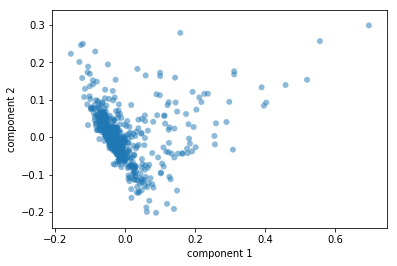

In [130]:
plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.colorbar();

In [476]:
michigan_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Football Field,College Gym,College Rec Center,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lottery Retailer,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pier,Piercing Parlor,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pop-Up Shop,Post Office,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Resort,Restaurant,River,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Tanning Salon,Tapas Res

In [477]:
data = michigan_grouped.copy()
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# new data frame with split value columns 
new = data["Neighborhood"].str.split("-", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
# data["Area"]= new[0] 
  
# making seperate last name column from new data frame 
data["PostCode"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Neighborhood"], inplace = True) 
  
# df display 
data.head()

,Zoo Exhibit,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Football Field,College Gym,College Rec Center,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lottery Retailer,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pier,Piercing Parlor,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pop-Up Shop,Post Office,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Resort,Restaurant,River,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tatto

In [478]:
data['PostCode'] = neighborhoods1['PostCode'].astype(int)
neighborhoods_venues_sorted['PostCode'] = neighborhoods_venues_sorted['PostCode'].astype(int)

In [479]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

michigan_merged = data.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
michigan_merged = michigan_merged.merge(neighborhoods_venues_sorted, on='PostCode', how='left')

michigan_merged.head() # check the last columns!

,Zoo Exhibit,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Carpet Store,Casino,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Football Field,College Gym,College Rec Center,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lottery Retailer,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pier,Piercing Parlor,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pop-Up Shop,Post Office,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rental Service,Resort,Restaurant,River,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tatto